In [6]:
# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot#
import cv2
from extractfaces import *
# importing the necessary libraries

ModuleNotFoundError: No module named 'extractfaces'

In [7]:
# load faces
data = load('5-celebrity-faces-dataset.npz')
testX_faces = data['arr_2']# after loading pulling the correct array for test data



In [8]:
# load face embeddings
data = load('5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3'] # loading the correct array accordingly

In [9]:
# normalize input vectors
in_encoder = Normalizer(norm='l2')  # creating the normalizer
trainX = in_encoder.transform(trainX) # normalizing the datas
testX = in_encoder.transform(testX)

In [10]:
# label encode targets
out_encoder = LabelEncoder() # creating the label encoder
out_encoder.fit(trainy) # inserting the label names sto the encoder
trainy = out_encoder.transform(trainy) #giving the label to these objects
testy = out_encoder.transform(testy) # same as above

In [11]:
# fit model
model = SVC(kernel='linear', probability=True) # creating our classifier as liner SVC
model.fit(trainX, trainy) # train the data with the labels using classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
"""# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])]) # iterating over the data to select random person's image for verification
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
random_face_name """

array(['madonna'], dtype='<U14')

In [21]:
# prediction for the face
samples = expand_dims(random_face_emb, axis=0) # expending the list of embeddings
yhat_class = model.predict(samples) # predicting the given sample
yhat_prob = model.predict_proba(samples) # getting the probability of the verification

In [22]:
# get name
class_index = yhat_class[0] # saving the predicted data
class_probability = yhat_prob[0,class_index] * 100 # getting the probability as percentage
predict_names = out_encoder.inverse_transform(yhat_class) # inversing the numerical labeling to the string
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability)) # printing the predicted name and probability
print('Expected: %s' % random_face_name[0]) # printing the expected name 

Predicted: madonna (86.073)
Expected: madonna


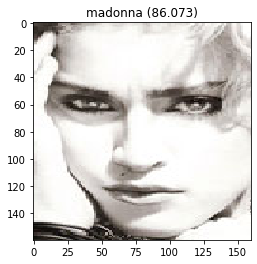

In [23]:
# plot for fun
pyplot.imshow(random_face_pixels) # plotting for visjualization
title = '%s (%.3f)' % (predict_names[0], class_probability) # adding a title to plot
pyplot.title(title)
pyplot.show() # plotting